### EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 시각화 설정
plt.style.use('seaborn')
sns.set(font='AppleGothic', rc={'axes.unicode_minus':False})

In [4]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [9]:
print(train_df.columns)
train_df.head(2)

Index(['UID', '주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수',
       '신용 거래 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
       '대출 목적', '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
       '채무 불이행 여부'],
      dtype='object')


,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,TRAIN_00000,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0
1,TRAIN_00001,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0


In [10]:
print(test_df.columns)
test_df.head(2)

Index(['UID', '주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수',
       '신용 거래 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
       '대출 목적', '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수'],
      dtype='object')


,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수
0,TEST_0000,월세,1560090.0,10년 이상,0.0,13,12.0,495561.0,0,18,0,기타,단기 상환,376332.0,133522.5,29641.5,736
1,TEST_0001,주택 담보 대출 (거주 중),2102616.0,2년,0.0,9,29.0,580833.0,0,40,0,부채 통합,장기 상환,830379.0,302983.5,20151.0,718


In [11]:
# 데이터 타입 확인
train_df.dtypes

UID                   object
주거 형태                 object
연간 소득                float64
현재 직장 근속 연수           object
체납 세금 압류 횟수          float64
개설된 신용계좌 수             int64
신용 거래 연수             float64
최대 신용한도              float64
신용 문제 발생 횟수            int64
마지막 연체 이후 경과 개월 수      int64
개인 파산 횟수               int64
대출 목적                 object
대출 상환 기간              object
현재 대출 잔액             float64
현재 미상환 신용액           float64
월 상환 부채액             float64
신용 점수                  int64
채무 불이행 여부              int64
dtype: object

In [53]:
# 결측치 확인
train_df.isnull().sum()
# test_df.isnull().sum()
'''
결측치 없음 (처리 불필요)
'''

UID                  0
주거 형태                0
연간 소득                0
현재 직장 근속 연수          0
체납 세금 압류 횟수          0
개설된 신용계좌 수           0
신용 거래 연수             0
최대 신용한도              0
신용 문제 발생 횟수          0
마지막 연체 이후 경과 개월 수    0
개인 파산 횟수             0
대출 목적                0
대출 상환 기간             0
현재 대출 잔액             0
현재 미상환 신용액           0
월 상환 부채액             0
신용 점수                0
채무 불이행 여부            0
dtype: int64

In [13]:
# 기본 통계량 확인
train_df.describe()

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.00000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.00000,10000.000000,10000.000000
mean,2.163959e+06,0.199300,12.248900,19.879360,1.175265e+06,0.62620,30.889200,0.373200,5.061200e+05,3.649126e+05,22367.28075,744.215000,0.341200
std,1.434430e+06,0.714304,4.620572,7.206693,1.604199e+06,1.23419,20.011561,0.843797,2.831462e+05,3.537942e+05,15186.49738,56.995698,0.474136
min,2.676210e+05,0.000000,2.000000,6.000000,0.000000e+00,0.00000,0.000000,0.000000,2.917650e+04,0.000000e+00,0.00000,502.000000,0.000000
25%,1.311437e+06,0.000000,9.000000,14.600000,4.482476e+05,0.00000,14.000000,0.000000,3.001901e+05,1.471856e+05,10893.75000,704.000000,0.000000
50%,1.743223e+06,0.000000,12.000000,17.950000,7.670910e+05,0.00000,28.000000,0.000000,4.743412e+05,2.547930e+05,20160.00000,756.000000,0.000000
75%,2.447664e+06,0.000000,15.000000,24.100000,1.147283e+06,1.00000,41.000000,0.000000,5.919079e+05,4.749180e+05,30647.25000,793.000000,1.000000
max,1.722975e+07,7.000000,35.000000,51.700000,2.323233e+07,7.00000,88.000000,3.000000,1.373613e+06,3.946300e+06,153574.50000,825.000000,1.000000


In [23]:
# 채무불이행 여부 비율 확인
train_df['채무 불이행 여부'].value_counts(normalize=True)

'''
불균형 있긴 하지만 심하진 않음
'''

채무 불이행 여부
0    0.6588
1    0.3412
Name: proportion, dtype: float64

### 번주형 변수 분석

In [35]:
# 범주형 변수 분석 
# 범주형 변수별 빈도수 분석
categorical_cols = [col for col in train_df.select_dtypes(include=['object']).columns if col != 'UID']

for col in categorical_cols:
    print(f"\n<<<< {col} 빈도수 분석 >>>>")
    value_counts = train_df[col].value_counts()
    print(f"전체 고유값 개수: {len(value_counts)}")
    print("\n빈도수 순위:")
    for idx, (value, count) in enumerate(value_counts.items(), 1):
        print(f"{idx}. {value}: {count}건 ({count/len(train_df)*100:.1f}%)")


<<<< 주거 형태 빈도수 분석 >>>>
전체 고유값 개수: 4

빈도수 순위:
1. 월세: 4050건 (40.5%)
2. 주택 담보 대출 (거주 중): 3633건 (36.3%)
3. 자가: 2241건 (22.4%)
4. 주택 담보 대출 (비거주 중): 76건 (0.8%)

<<<< 현재 직장 근속 연수 빈도수 분석 >>>>
전체 고유값 개수: 11

빈도수 순위:
1. 10년 이상: 3828건 (38.3%)
2. 2년: 1225건 (12.2%)
3. 8년: 841건 (8.4%)
4. 5년: 729건 (7.3%)
5. 7년: 619건 (6.2%)
6. 1년: 581건 (5.8%)
7. 4년: 541건 (5.4%)
8. 3년: 523건 (5.2%)
9. 1년 미만: 488건 (4.9%)
10. 6년: 357건 (3.6%)
11. 9년: 268건 (2.7%)

<<<< 대출 목적 빈도수 분석 >>>>
전체 고유값 개수: 14

빈도수 순위:
1. 부채 통합: 7294건 (72.9%)
2. 기타: 970건 (9.7%)
3. 주택 개보수: 909건 (9.1%)
4. 사업 대출: 254건 (2.5%)
5. 여행 자금: 173건 (1.7%)
6. 의료비: 158건 (1.6%)
7. 자동차 구매: 95건 (0.9%)
8. 고액 구매: 68건 (0.7%)
9. 소규모 사업 자금: 26건 (0.3%)
10. 주택 구매: 26건 (0.3%)
11. 결혼 자금: 14건 (0.1%)
12. 휴가 비용: 6건 (0.1%)
13. 이사 비용: 4건 (0.0%)
14. 교육비: 3건 (0.0%)

<<<< 대출 상환 기간 빈도수 분석 >>>>
전체 고유값 개수: 2

빈도수 순위:
1. 단기 상환: 6975건 (69.8%)
2. 장기 상환: 3025건 (30.2%)


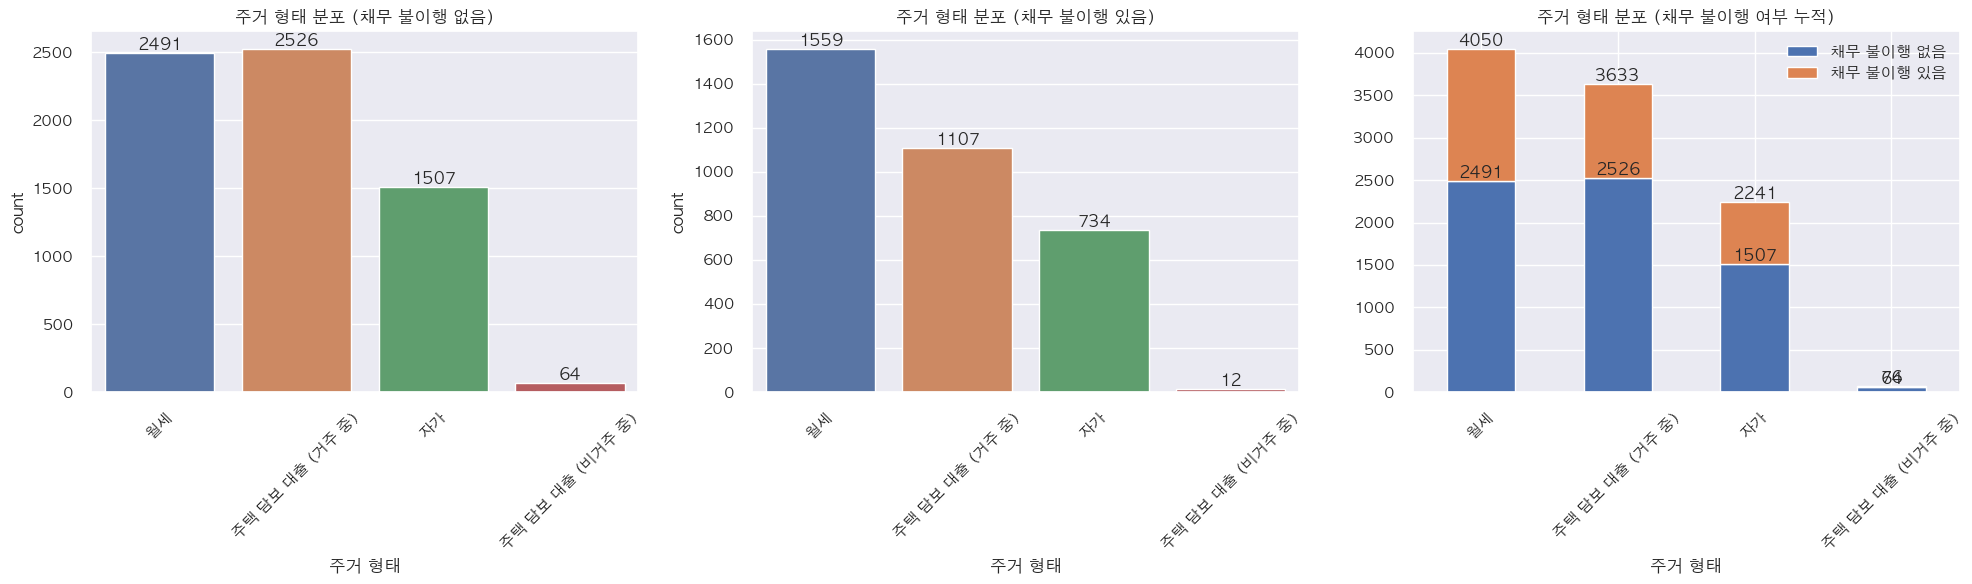

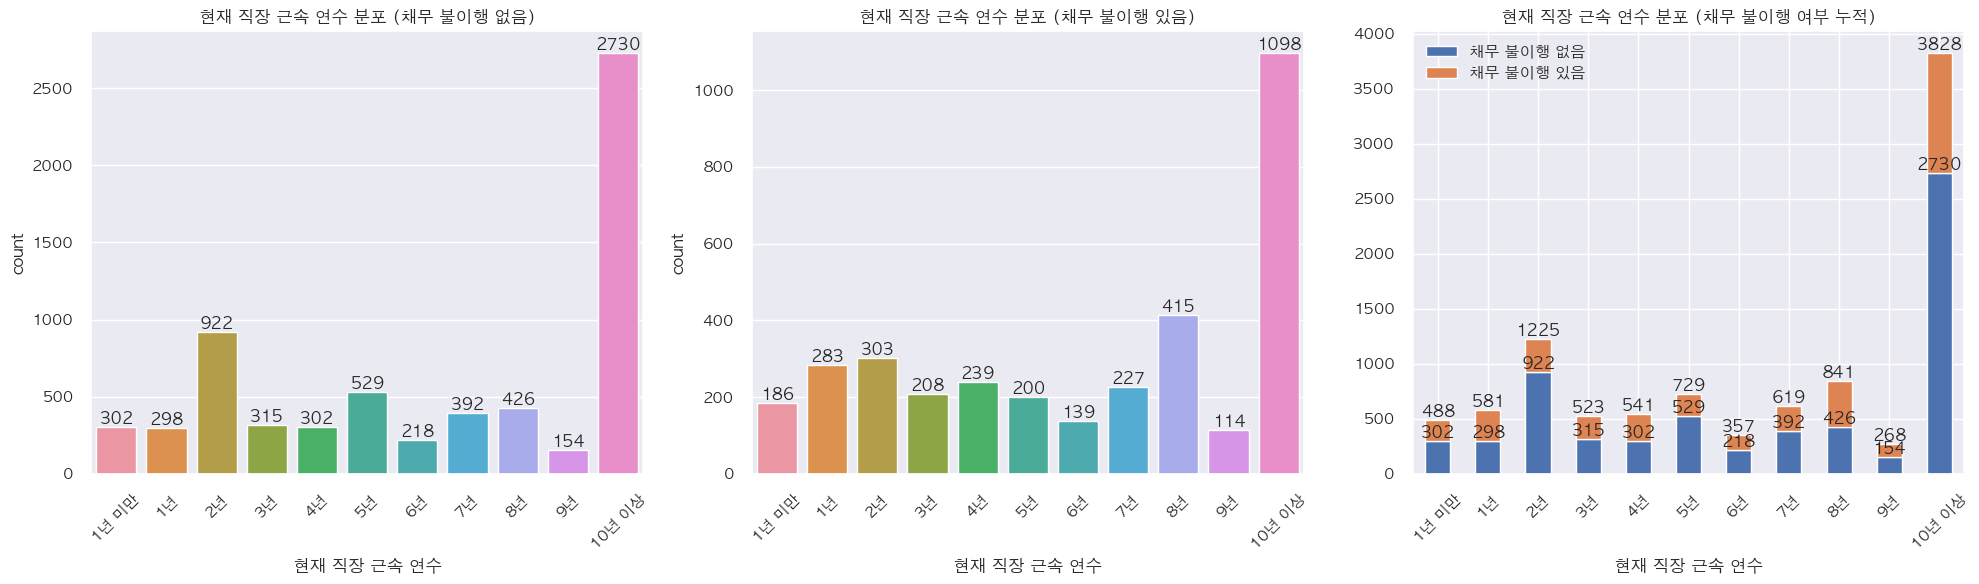

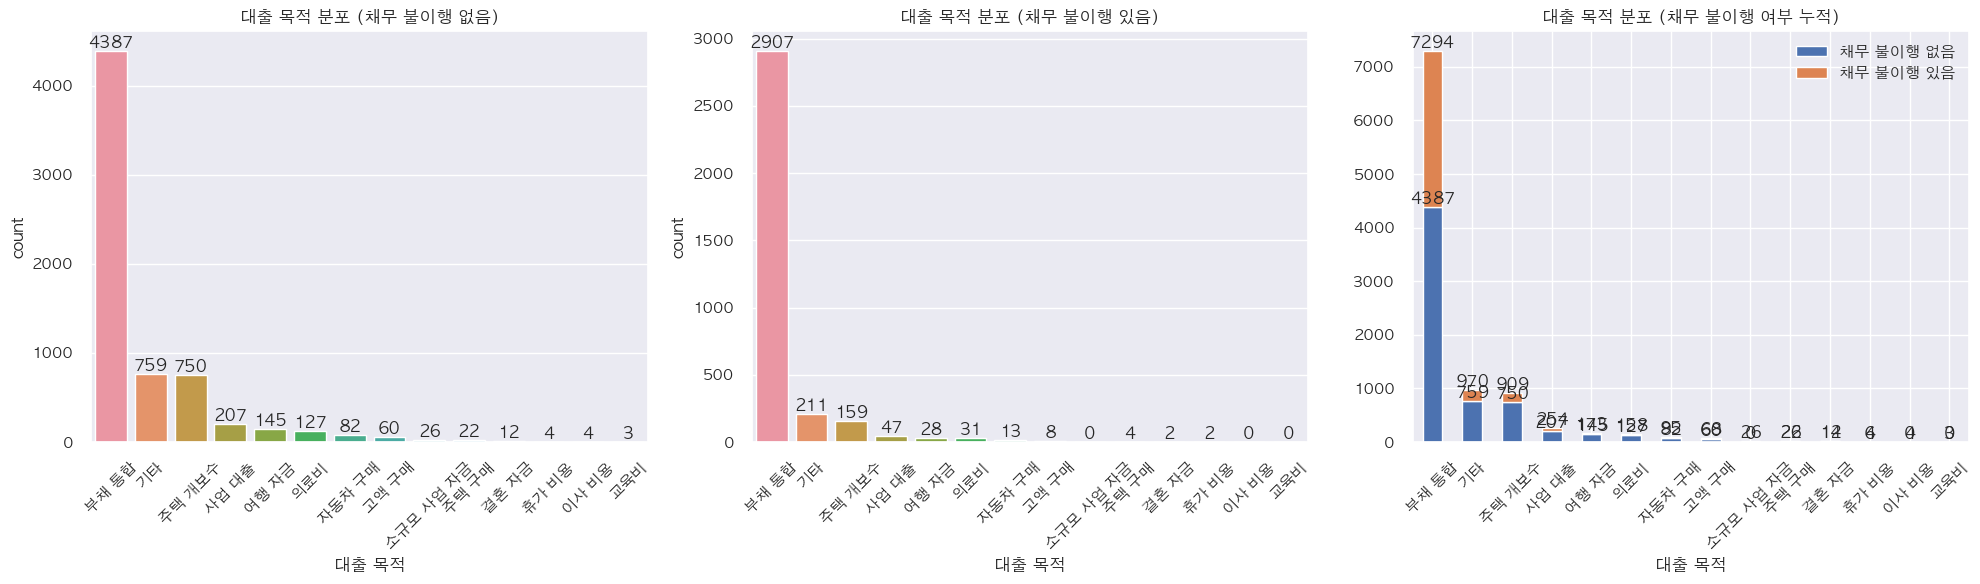

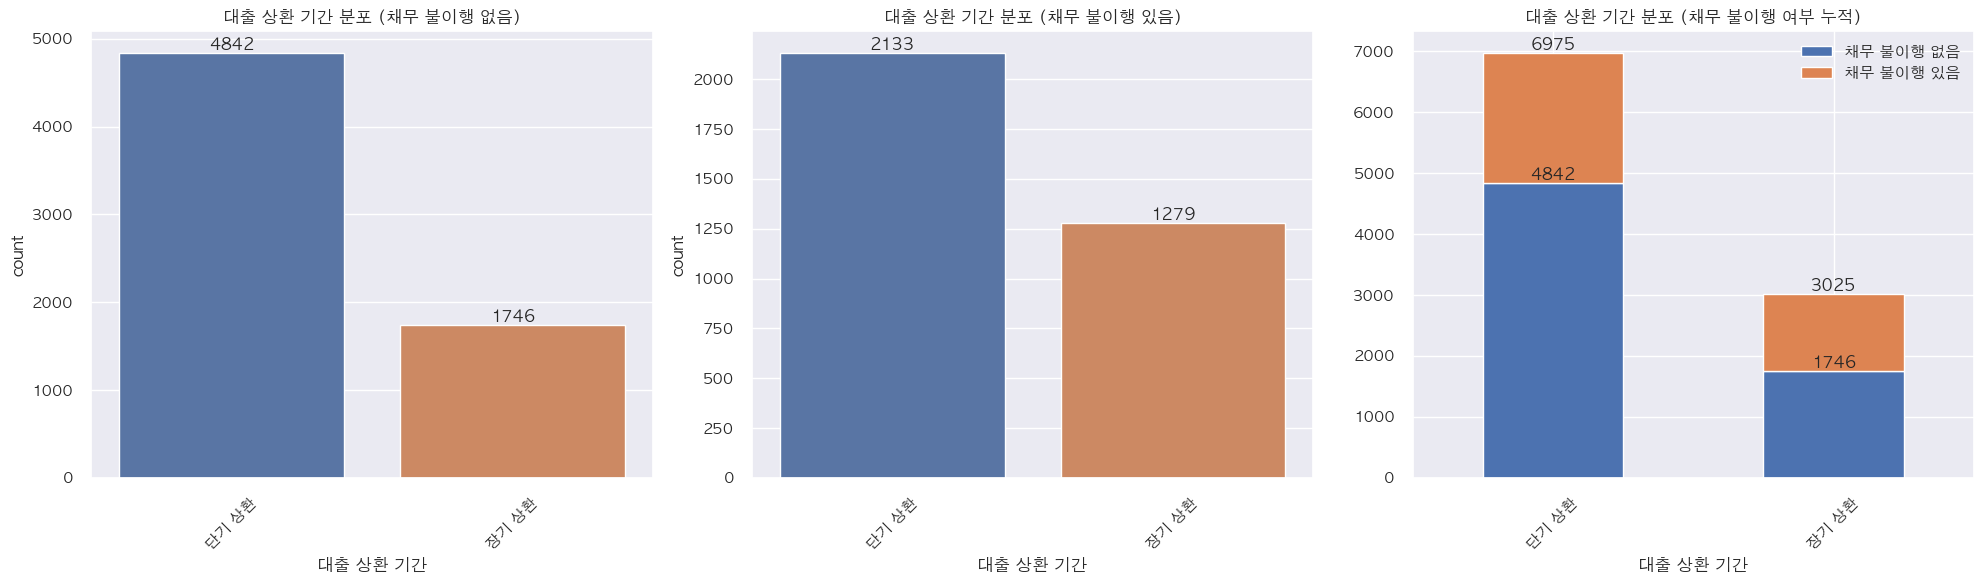

In [36]:
# 각 변수별 빈도수 높은 순서대로 정렬
custom_orders = {
    '주거 형태': ['월세', '주택 담보 대출 (거주 중)', '자가', '주택 담보 대출 (비거주 중)'],
    # 근속 연수는 빈도수와 무관 (10년 다음이 2년인건 신기함)
    '현재 직장 근속 연수': ['1년 미만', '1년', '2년', '3년', '4년', '5년', '6년', '7년', '8년', '9년', '10년 이상'],
    '대출 목적': ['부채 통합', '기타', '주택 개보수', '사업 대출', '여행 자금', '의료비', '자동차 구매', '고액 구매', '소규모 사업 자금', '주택 구매', '결혼 자금', '휴가 비용', '이사 비용', '교육비'],
    '대출 상환 기간': ['단기 상환', '장기 상환']
}
for col in categorical_cols:
    # 전체 figure 크기 설정
    fig = plt.figure(figsize=(20, 6))
    
    # 1. 채무 불이행 없음 (0)
    ax1 = plt.subplot(131)  
    sns.countplot(data=train_df[train_df['채무 불이행 여부'] == 0], 
                 x=col, order=custom_orders[col], ax=ax1)
    ax1.set_title(f'{col} 분포 (채무 불이행 없음)')
    
    # 막대 위에 개수 표시
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='bottom')
    
    plt.xticks(rotation=45)
    
    # 2. 채무 불이행 있음 (1)
    ax2 = plt.subplot(132)  
    sns.countplot(data=train_df[train_df['채무 불이행 여부'] == 1], 
                 x=col, order=custom_orders[col], ax=ax2)
    ax2.set_title(f'{col} 분포 (채무 불이행 있음)')
    
    # 막대 위에 개수 표시
    for p in ax2.patches:
        ax2.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='bottom')
    
    plt.xticks(rotation=45)
    
    # 3. 누적 막대 그래프
    ax3 = plt.subplot(133)  
    cross_tab = pd.crosstab(train_df[col], train_df['채무 불이행 여부'])
    # 지정된 순서로 재정렬
    cross_tab = cross_tab.reindex(custom_orders[col])
    
    cross_tab.plot(kind='bar', stacked=True, ax=ax3)
    ax3.set_title(f'{col} 분포 (채무 불이행 여부 누적)')
    ax3.legend(['채무 불이행 없음', '채무 불이행 있음'])
    
    # 누적 막대 위에 개수 표시
    for c in ax3.containers:
        ax3.bar_label(c, fmt='%d')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

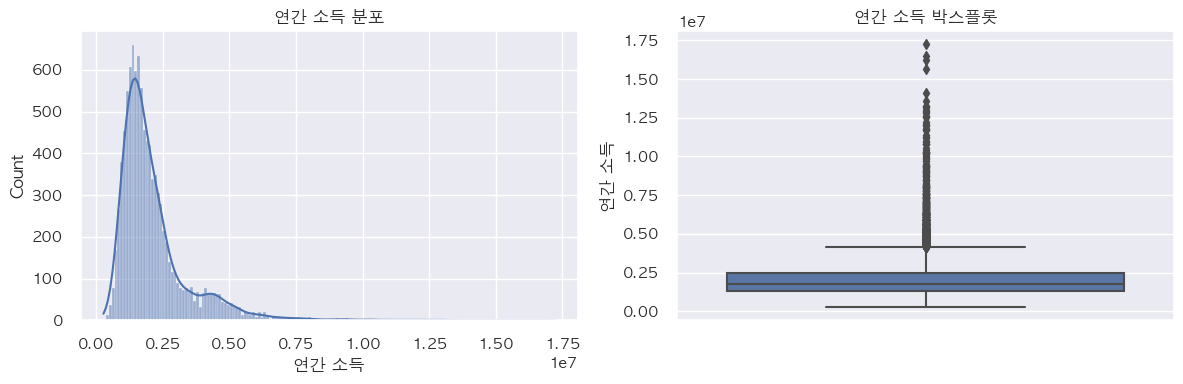

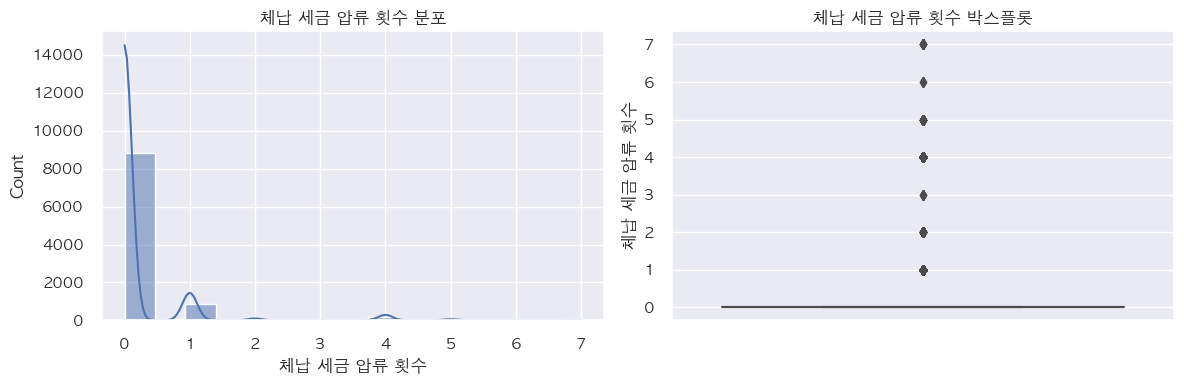

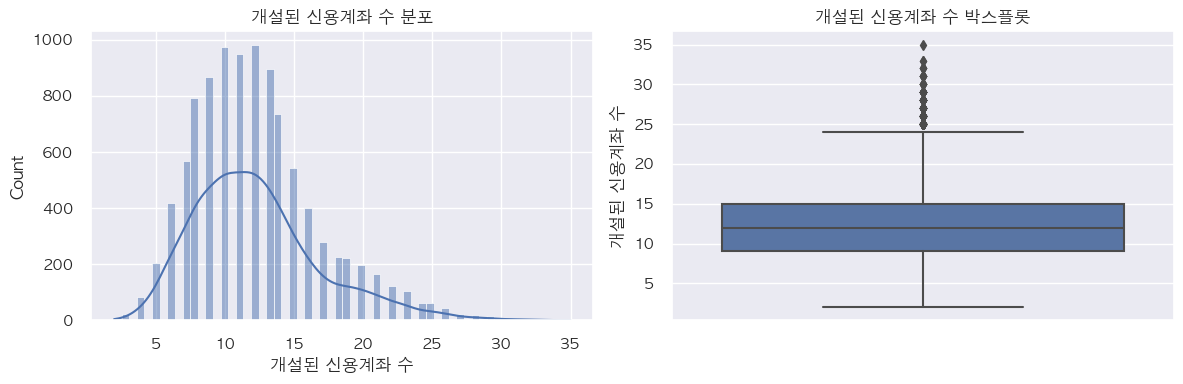

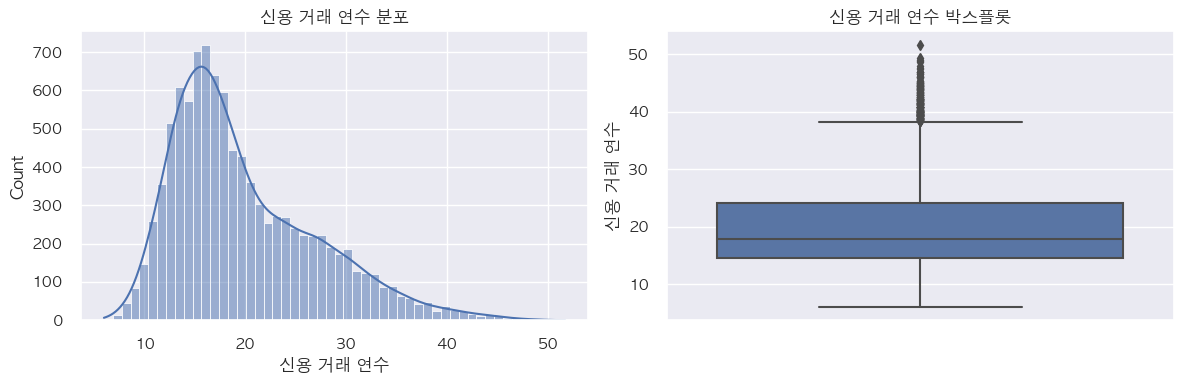

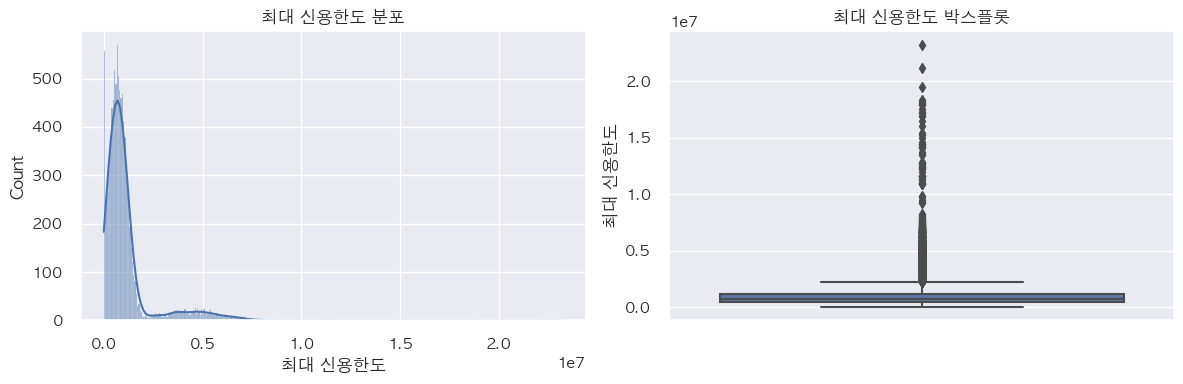

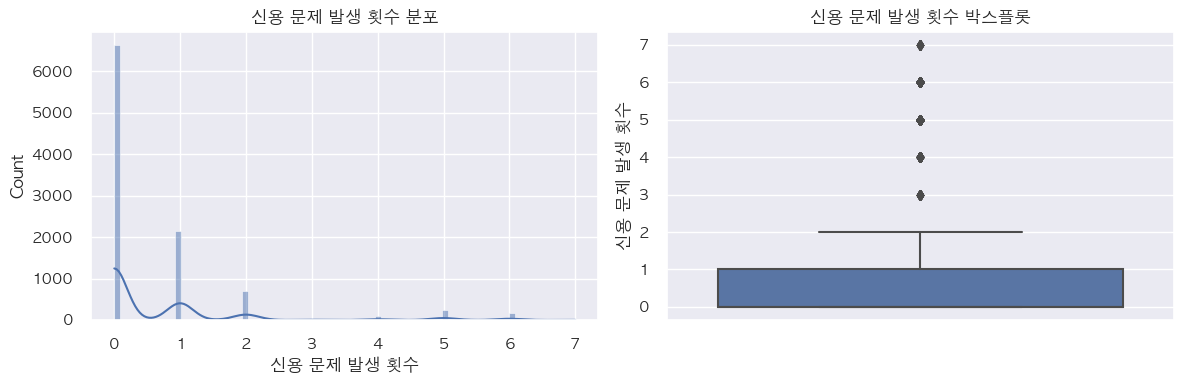

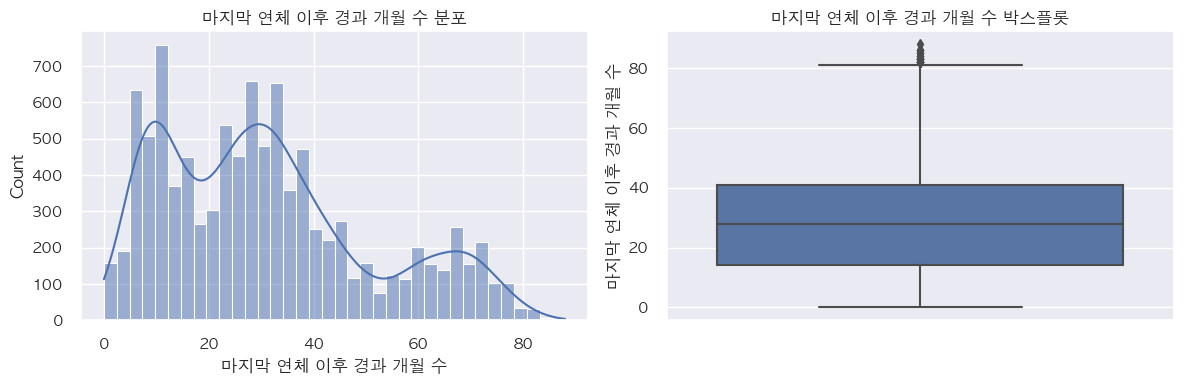

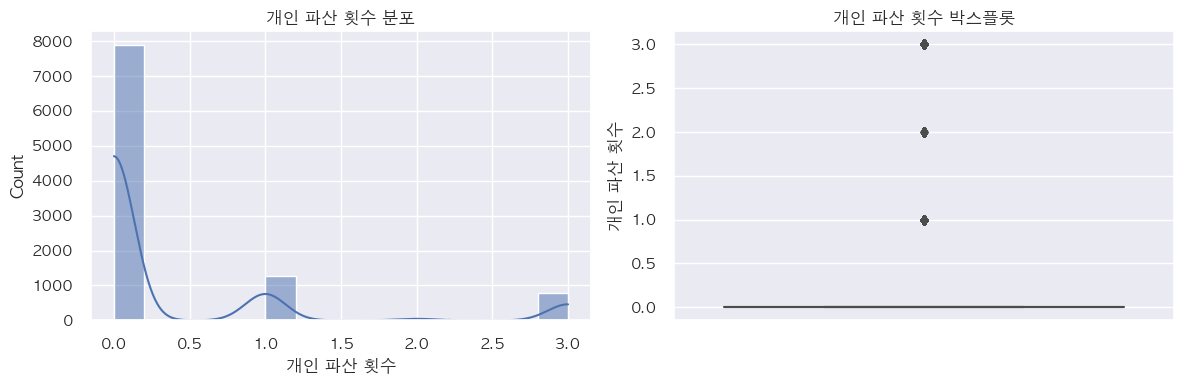

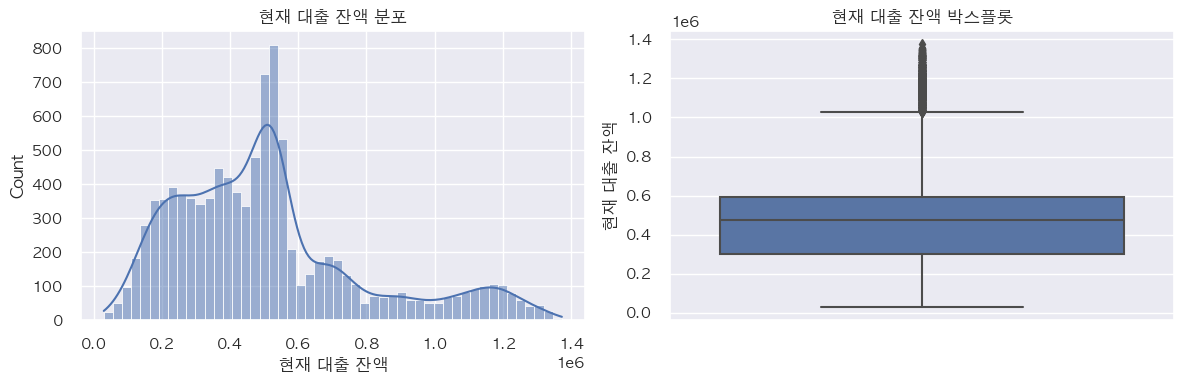

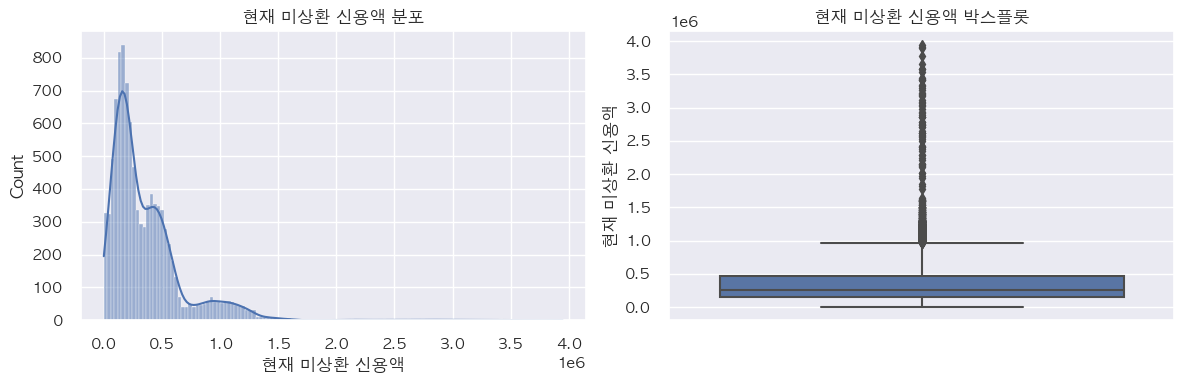

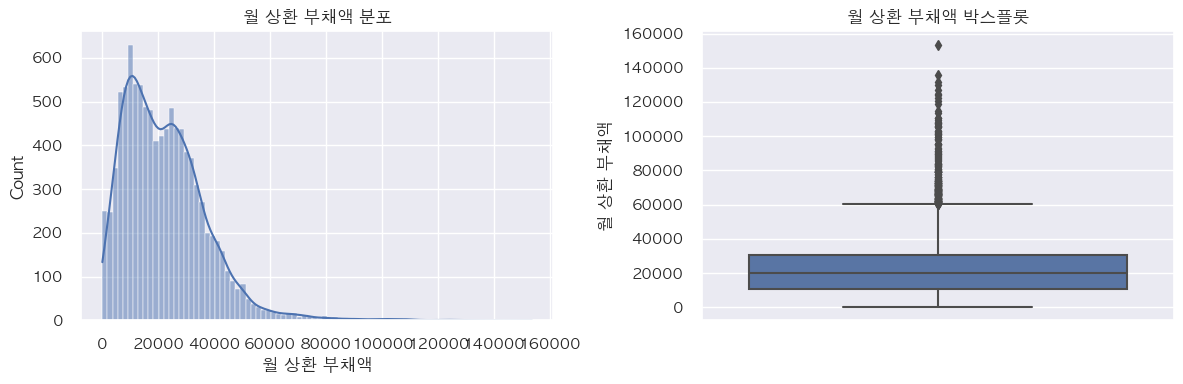

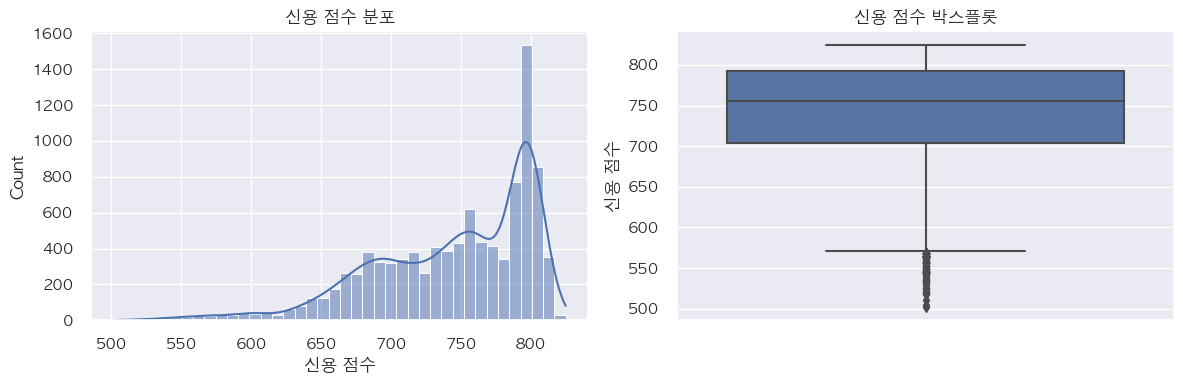

In [43]:
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_cols if col != '채무 불이행 여부']  # 타겟 변수 제외

for col in numeric_cols:
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data=train_df, x=col, kde=True)
    plt.title(f'{col} 분포')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=train_df, y=col)
    plt.title(f'{col} 박스플롯')
    
    plt.tight_layout()

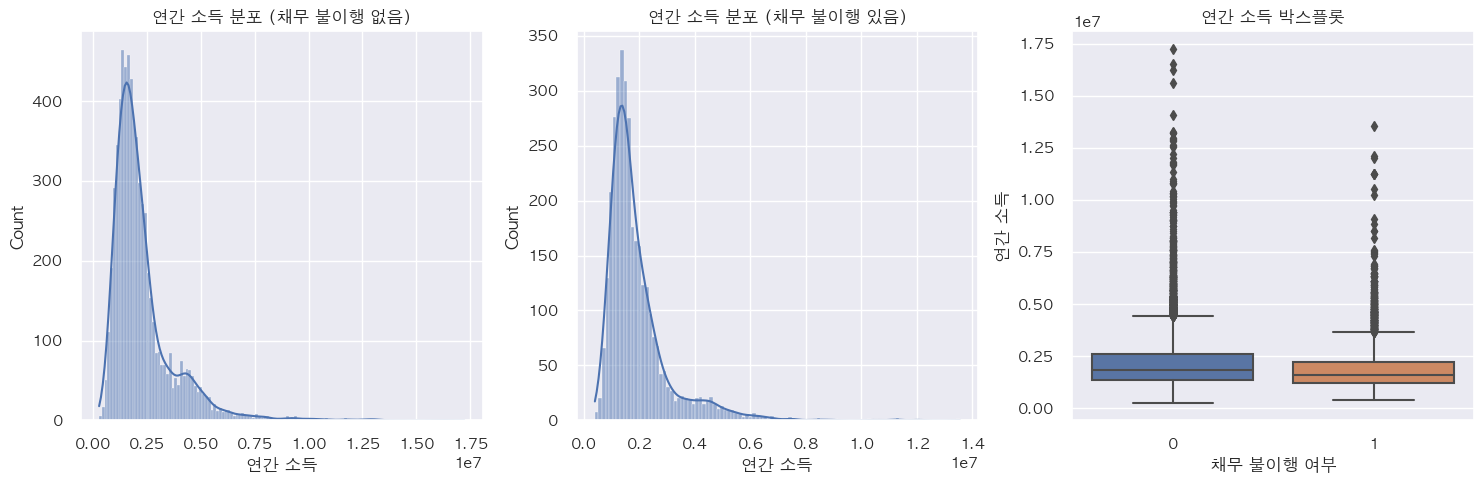

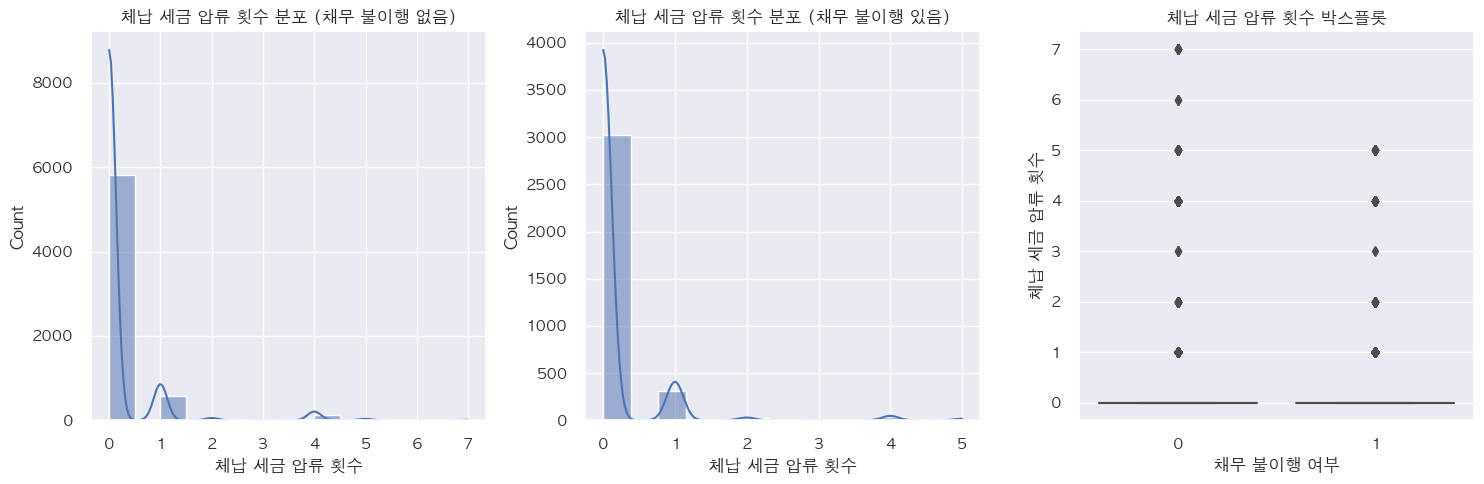

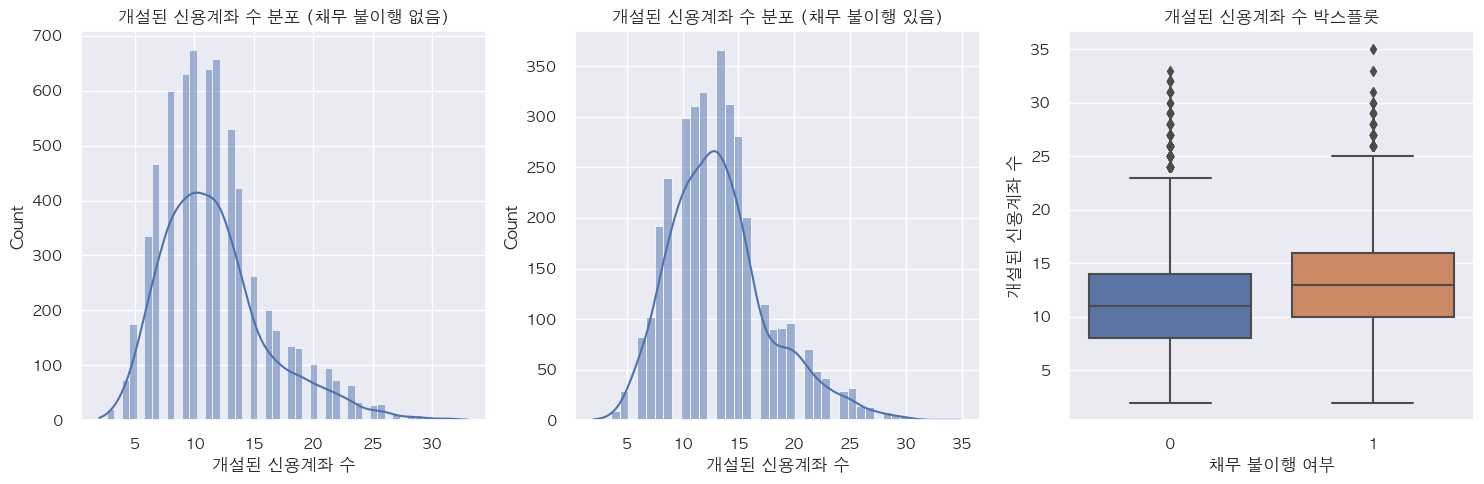

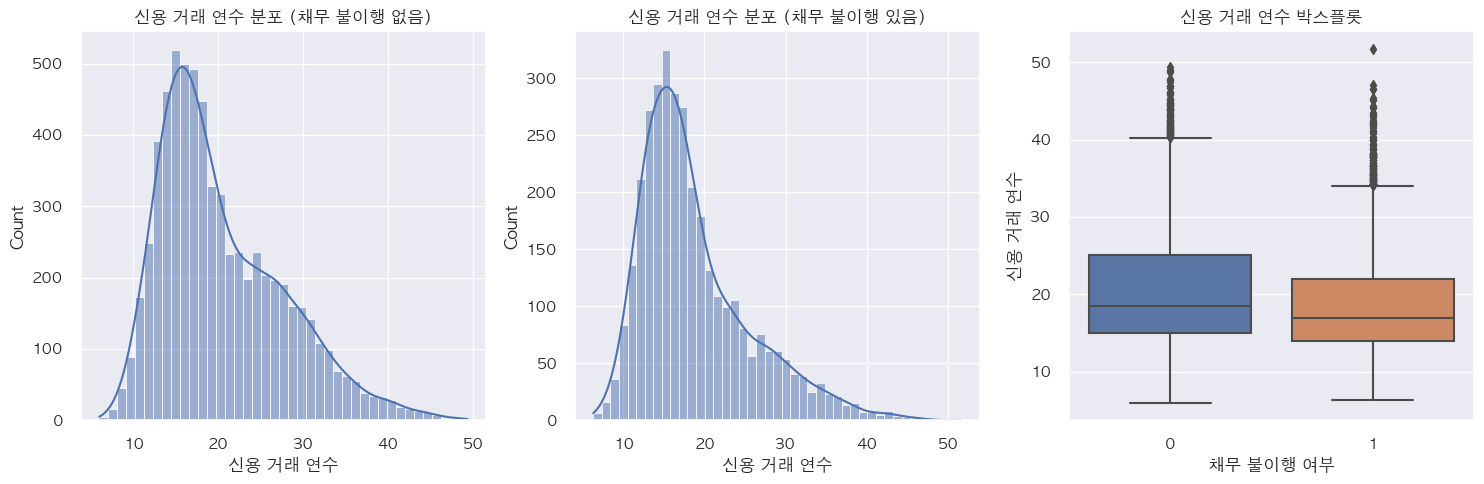

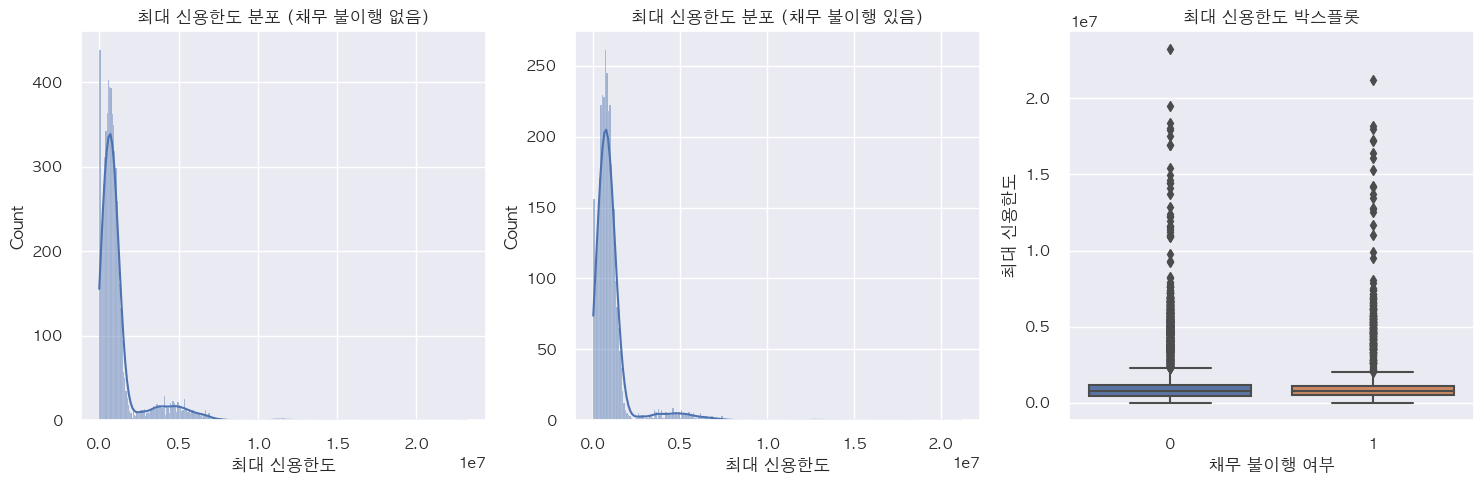

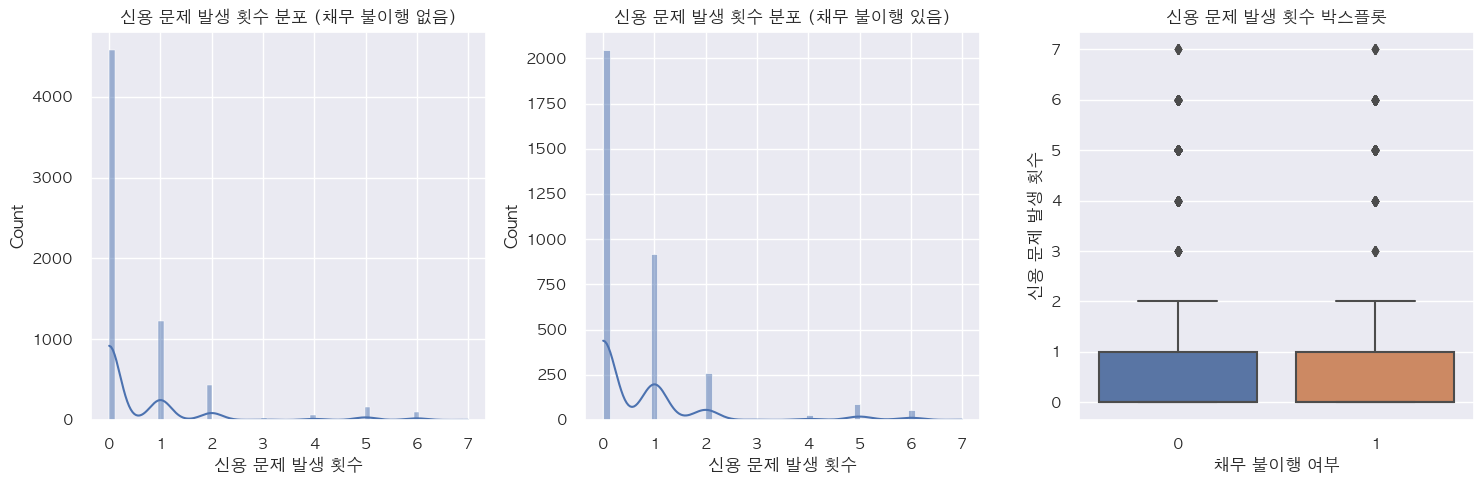

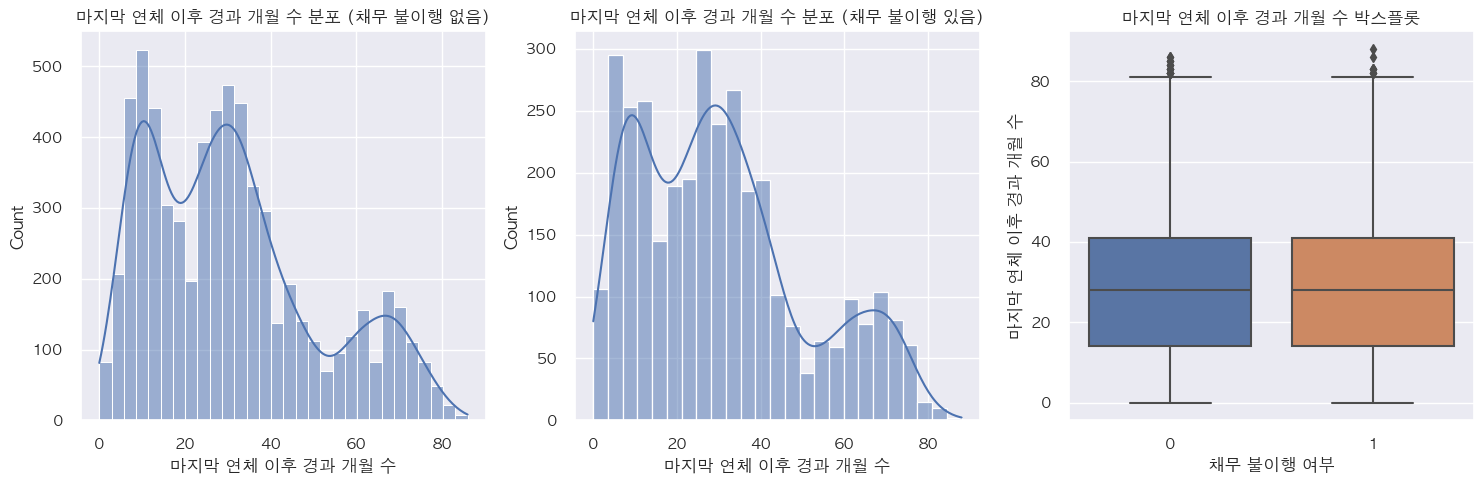

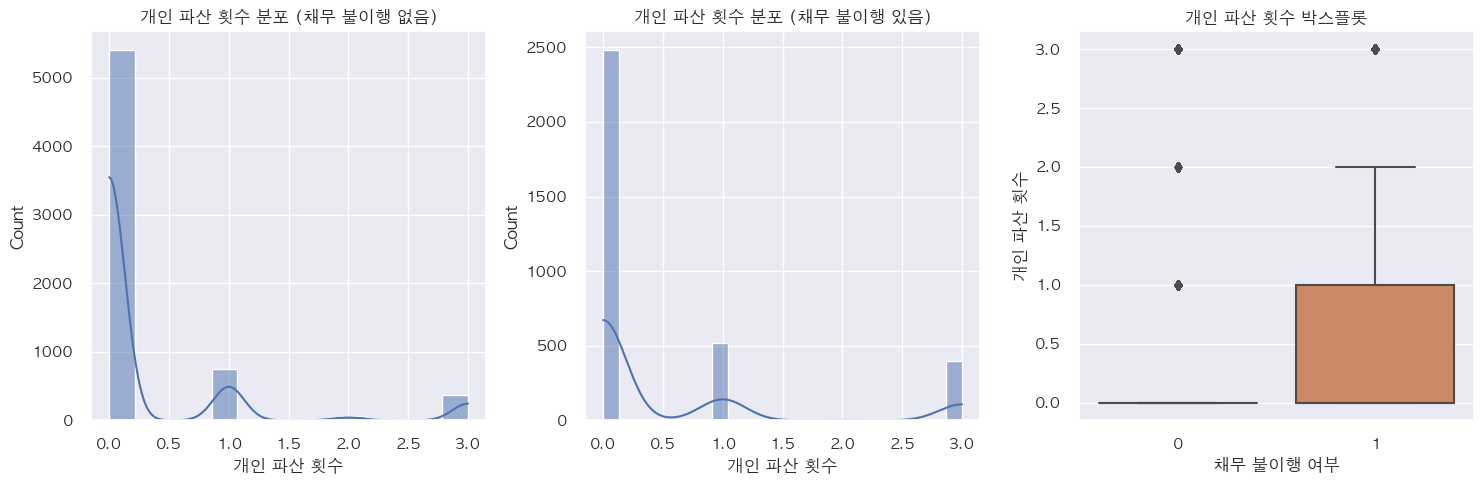

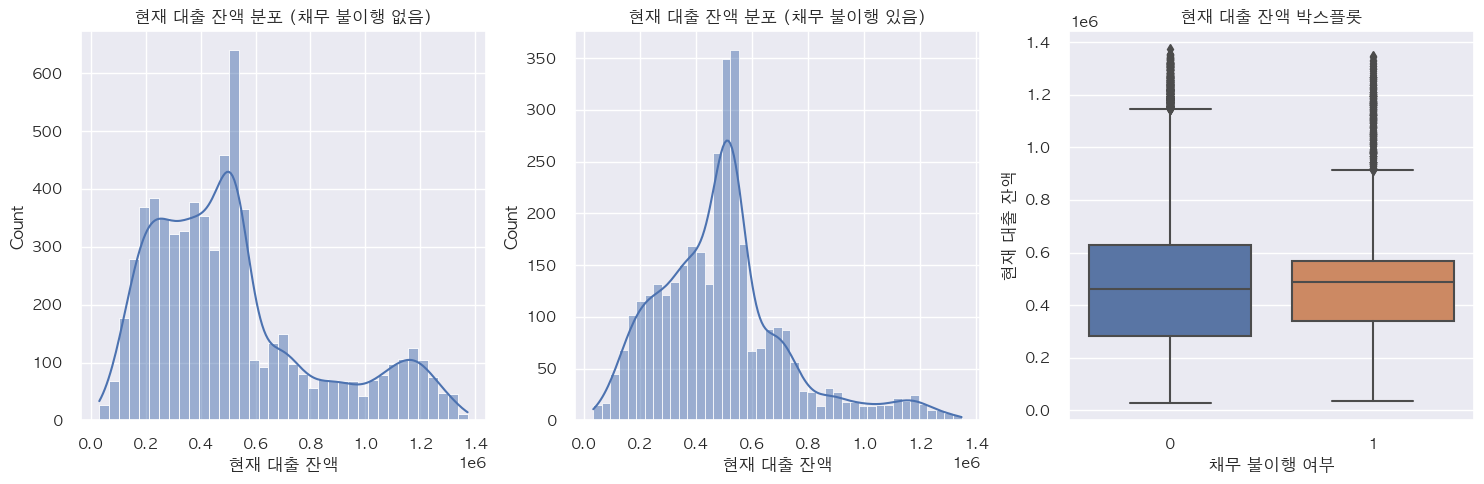

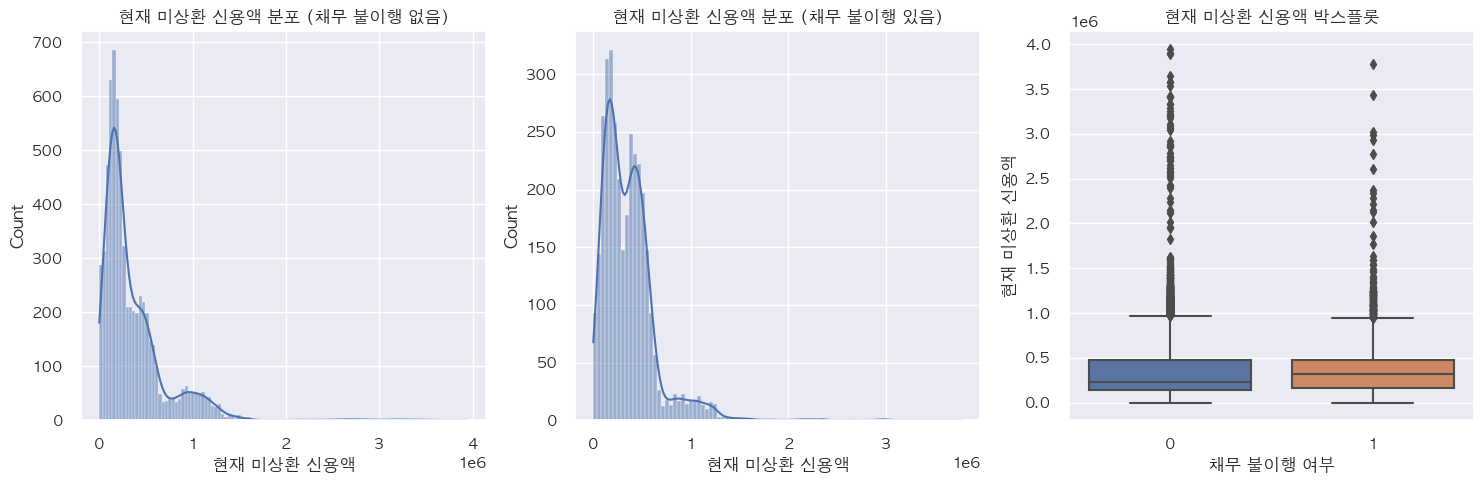

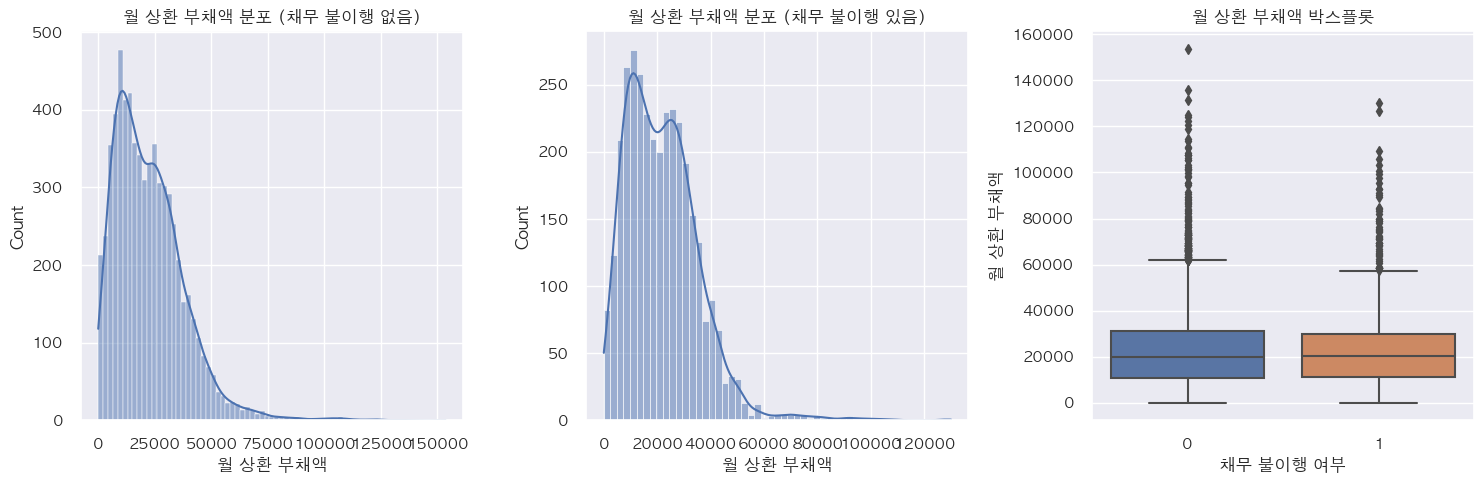

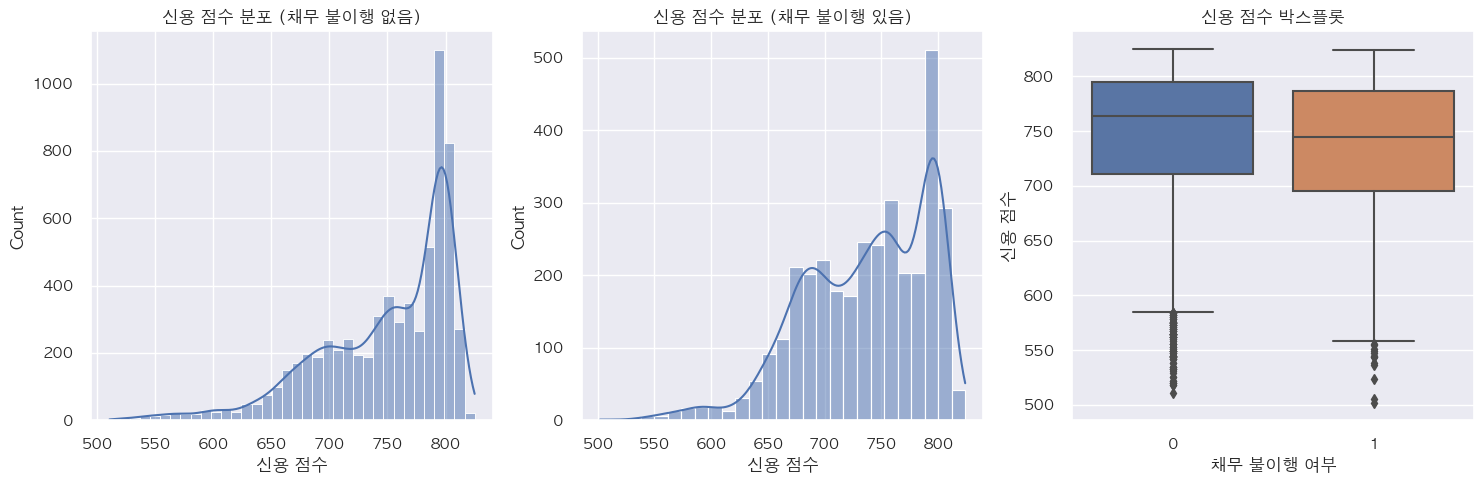

In [44]:
for col in numeric_cols:
    plt.figure(figsize=(15, 5))
    
    # 1. 채무 불이행 없음 (0)
    plt.subplot(1, 3, 1)
    sns.histplot(data=train_df[train_df['채무 불이행 여부'] == 0], 
                x=col, kde=True)
    plt.title(f'{col} 분포 (채무 불이행 없음)')
    
    # 2. 채무 불이행 있음 (1)
    plt.subplot(1, 3, 2)
    sns.histplot(data=train_df[train_df['채무 불이행 여부'] == 1], 
                x=col, kde=True)
    plt.title(f'{col} 분포 (채무 불이행 있음)')
    
    # 3. 박스플롯
    plt.subplot(1, 3, 3)
    sns.boxplot(data=train_df, x='채무 불이행 여부', y=col)
    plt.title(f'{col} 박스플롯')
    
    plt.tight_layout()
    plt.show()

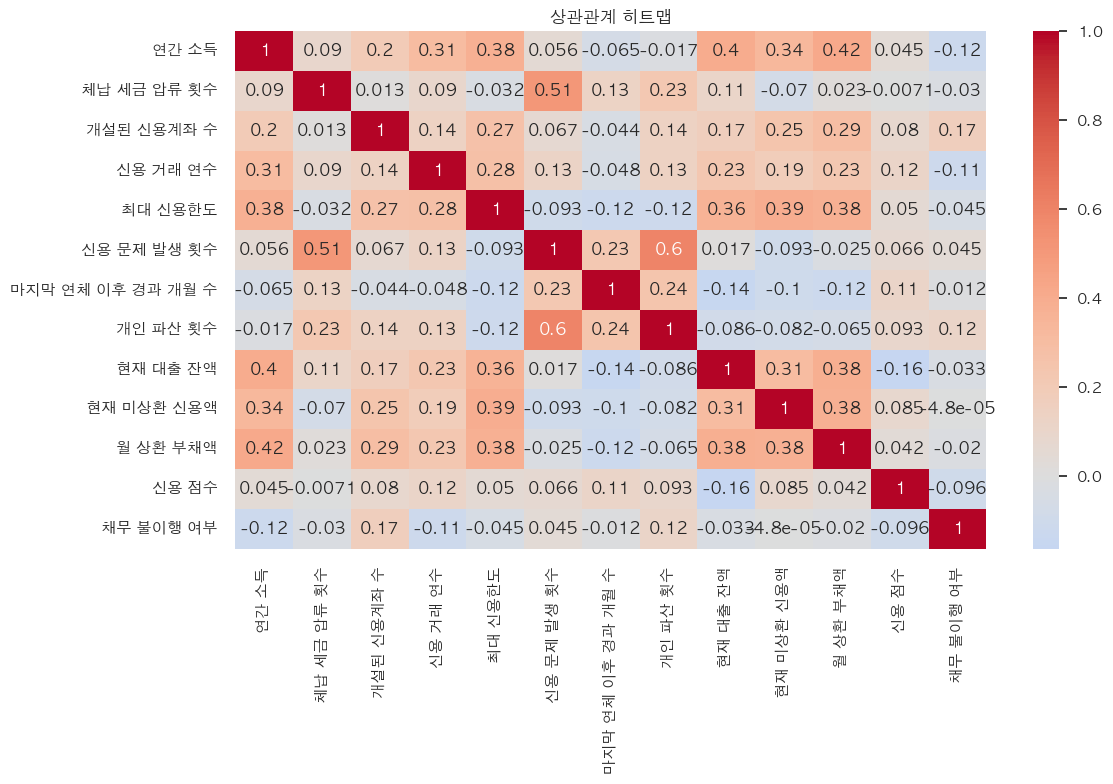

In [46]:
# 상관관계 히트맵
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(train_df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('상관관계 히트맵')
plt.tight_layout()